# filter ALL simulations and plot result

In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
plt.rc("font",size=14)

from netCDF4 import Dataset
import xarray, wrf

from pandas import to_datetime
from scipy.signal import welch
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

In [2]:
plt.rc("font",size=14)

In [3]:
from scipy import fftpack

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
height = 100.0

In [6]:
dx = {"MYNN":333.0,
       "SH":333.0,
       "VLES":333.0,
       "YSU":333.0,
       "LES_25":25.0,
       "LES_100":100.0}

In [7]:
day      = 21

In [8]:
directories = {"MYNN":"/glade/scratch/doubrawa/MYNN/03{0}15/".format(day),
               "SH":"/glade/scratch/doubrawa/SH/03{0}15/".format(day),
               "VLES":"/glade/scratch/doubrawa/VLES/03{0}15/".format(day),
               "YSU":"/glade/scratch/doubrawa/YSU/03{0}15/".format(day),
               "LES_25":"/glade/scratch/doubrawa/postProcessing/",
               "LES_100":"/glade/scratch/doubrawa/postProcessing/"}

In [9]:
figPath = "/glade/u/home/doubrawa/figs/"

### loop over time

In [10]:
def get_array_at_time(dictionary,key,datetime):
    try:
        contour = dictionary[key].sel(time=datetime)
    except:
        print("skipping...")
        datetimes_available = dictionary[key]["time"]
        dt_offsets = np.asarray([ (to_datetime(a)-datetime).seconds for a in datetimes_available.data])
        if (np.min(dt_offsets) < 2*60.0):
            idx   = np.argmin(dt_offsets)
            avail = to_datetime(datetimes_available.data[idx])
            contour = dictionary[key].sel(time=avail)
        print ("Couldn't find {0:%Y-%m-%d %H:%M:%S} for {2}, settling for {1:%Y-%m-%d %H:%M:%S}".format(datetime,avail,key))

    return contour.interpolate_na(dim='south_north').interpolate_na(dim='west_east')

**********************************
MYNN
wrfout_d03_2015-03-21_14:00:00
**********************************
SH
wrfout_d03_2015-03-21_14:00:00
**********************************
VLES
wrfout_d03_2015-03-21_14:00:00
**********************************
YSU
wrfout_d03_2015-03-21_14:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_14:00_14:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_14:01_14:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 14:00:00 for LES_25, settling for 2015-03-21 14:00:10
skipping...
Couldn't find 2015-03-21 14:00:00 for LES_100, settling for 2015-03-21 14:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


LES_25


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_14:30:00
**********************************
SH
wrfout_d03_2015-03-21_14:30:00
**********************************
VLES
wrfout_d03_2015-03-21_14:30:00
**********************************
YSU
wrfout_d03_2015-03-21_14:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_14:30_15:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_14:31_15:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 14:30:00 for LES_25, settling for 2015-03-21 14:30:10
skipping...
Couldn't find 2015-03-21 14:30:00 for LES_100, settling for 2015-03-21 14:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_15:00:00
**********************************
SH
wrfout_d03_2015-03-21_15:00:00
**********************************
VLES
wrfout_d03_2015-03-21_15:00:00
**********************************
YSU
wrfout_d03_2015-03-21_15:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_15:00_15:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_15:01_15:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 15:00:00 for LES_25, settling for 2015-03-21 15:00:10
skipping...
Couldn't find 2015-03-21 15:00:00 for LES_100, settling for 2015-03-21 15:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_15:30:00
**********************************
SH
wrfout_d03_2015-03-21_15:30:00
**********************************
VLES
wrfout_d03_2015-03-21_15:30:00
**********************************
YSU
wrfout_d03_2015-03-21_15:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_15:30_16:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_15:31_16:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 15:30:00 for LES_25, settling for 2015-03-21 15:30:10
skipping...
Couldn't find 2015-03-21 15:30:00 for LES_100, settling for 2015-03-21 15:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_16:00:00
**********************************
SH
wrfout_d03_2015-03-21_16:00:00
**********************************
VLES
wrfout_d03_2015-03-21_16:00:00
**********************************
YSU
wrfout_d03_2015-03-21_16:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_16:00_16:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_16:01_16:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 16:00:00 for LES_25, settling for 2015-03-21 16:00:10
skipping...
Couldn't find 2015-03-21 16:00:00 for LES_100, settling for 2015-03-21 16:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_16:30:00
**********************************
SH
wrfout_d03_2015-03-21_16:30:00
**********************************
VLES
wrfout_d03_2015-03-21_16:30:00
**********************************
YSU
wrfout_d03_2015-03-21_16:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_16:30_17:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_16:31_17:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 16:30:00 for LES_25, settling for 2015-03-21 16:30:10
skipping...
Couldn't find 2015-03-21 16:30:00 for LES_100, settling for 2015-03-21 16:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_17:00:00
**********************************
SH
wrfout_d03_2015-03-21_17:00:00
**********************************
VLES
wrfout_d03_2015-03-21_17:00:00
**********************************
YSU
wrfout_d03_2015-03-21_17:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_17:00_17:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_17:01_17:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 17:00:00 for LES_25, settling for 2015-03-21 17:00:10
skipping...
Couldn't find 2015-03-21 17:00:00 for LES_100, settling for 2015-03-21 17:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_17:30:00
**********************************
SH
wrfout_d03_2015-03-21_17:30:00
**********************************
VLES
wrfout_d03_2015-03-21_17:30:00
**********************************
YSU
wrfout_d03_2015-03-21_17:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_17:30_18:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_17:31_18:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 17:30:00 for LES_25, settling for 2015-03-21 17:30:10
skipping...
Couldn't find 2015-03-21 17:30:00 for LES_100, settling for 2015-03-21 17:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_18:00:00
**********************************
SH
wrfout_d03_2015-03-21_18:00:00
**********************************
VLES
wrfout_d03_2015-03-21_18:00:00
**********************************
YSU
wrfout_d03_2015-03-21_18:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_18:00_18:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_18:01_18:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 18:00:00 for LES_25, settling for 2015-03-21 18:00:10
skipping...
Couldn't find 2015-03-21 18:00:00 for LES_100, settling for 2015-03-21 18:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_18:30:00
**********************************
SH
wrfout_d03_2015-03-21_18:30:00
**********************************
VLES
wrfout_d03_2015-03-21_18:30:00
**********************************
YSU
wrfout_d03_2015-03-21_18:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_18:30_19:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_18:31_19:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 18:30:00 for LES_25, settling for 2015-03-21 18:30:10
skipping...
Couldn't find 2015-03-21 18:30:00 for LES_100, settling for 2015-03-21 18:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_19:00:00
**********************************
SH
wrfout_d03_2015-03-21_19:00:00
**********************************
VLES
wrfout_d03_2015-03-21_19:00:00
**********************************
YSU
wrfout_d03_2015-03-21_19:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_19:00_19:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_19:01_19:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 19:00:00 for LES_25, settling for 2015-03-21 19:00:10
skipping...
Couldn't find 2015-03-21 19:00:00 for LES_100, settling for 2015-03-21 19:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_19:30:00
**********************************
SH
wrfout_d03_2015-03-21_19:30:00
**********************************
VLES
wrfout_d03_2015-03-21_19:30:00
**********************************
YSU
wrfout_d03_2015-03-21_19:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_19:30_20:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_19:31_20:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 19:30:00 for LES_25, settling for 2015-03-21 19:30:10
skipping...
Couldn't find 2015-03-21 19:30:00 for LES_100, settling for 2015-03-21 19:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_20:00:00
**********************************
SH
wrfout_d03_2015-03-21_20:00:00
**********************************
VLES
wrfout_d03_2015-03-21_20:00:00
**********************************
YSU
wrfout_d03_2015-03-21_20:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_20:00_20:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_20:01_20:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 20:00:00 for LES_25, settling for 2015-03-21 20:00:10
skipping...
Couldn't find 2015-03-21 20:00:00 for LES_100, settling for 2015-03-21 20:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_20:30:00
**********************************
SH
wrfout_d03_2015-03-21_20:30:00
**********************************
VLES
wrfout_d03_2015-03-21_20:30:00
**********************************
YSU
wrfout_d03_2015-03-21_20:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_20:30_21:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_20:31_21:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 20:30:00 for LES_25, settling for 2015-03-21 20:30:10
skipping...
Couldn't find 2015-03-21 20:30:00 for LES_100, settling for 2015-03-21 20:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_21:00:00
**********************************
SH
wrfout_d03_2015-03-21_21:00:00
**********************************
VLES
wrfout_d03_2015-03-21_21:00:00
**********************************
YSU
wrfout_d03_2015-03-21_21:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_21:00_21:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_21:01_21:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 21:00:00 for LES_25, settling for 2015-03-21 21:00:10
skipping...
Couldn't find 2015-03-21 21:00:00 for LES_100, settling for 2015-03-21 21:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_21:30:00
**********************************
SH
wrfout_d03_2015-03-21_21:30:00
**********************************
VLES
wrfout_d03_2015-03-21_21:30:00
**********************************
YSU
wrfout_d03_2015-03-21_21:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_21:30_22:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_21:31_22:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 21:30:00 for LES_25, settling for 2015-03-21 21:30:10
skipping...
Couldn't find 2015-03-21 21:30:00 for LES_100, settling for 2015-03-21 21:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_22:00:00
**********************************
SH
wrfout_d03_2015-03-21_22:00:00
**********************************
VLES
wrfout_d03_2015-03-21_22:00:00
**********************************
YSU
wrfout_d03_2015-03-21_22:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_22:00_22:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_22:01_22:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 22:00:00 for LES_25, settling for 2015-03-21 22:00:10
skipping...
Couldn't find 2015-03-21 22:00:00 for LES_100, settling for 2015-03-21 22:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_22:30:00
**********************************
SH
wrfout_d03_2015-03-21_22:30:00
**********************************
VLES
wrfout_d03_2015-03-21_22:30:00
**********************************
YSU
wrfout_d03_2015-03-21_22:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_22:30_23:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_22:31_23:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 22:30:00 for LES_25, settling for 2015-03-21 22:30:10
skipping...
Couldn't find 2015-03-21 22:30:00 for LES_100, settling for 2015-03-21 22:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_23:00:00
**********************************
SH
wrfout_d03_2015-03-21_23:00:00
**********************************
VLES
wrfout_d03_2015-03-21_23:00:00
**********************************
YSU
wrfout_d03_2015-03-21_23:00:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_23:00_23:30.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_23:01_23:30.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 23:00:00 for LES_25, settling for 2015-03-21 23:00:10
skipping...
Couldn't find 2015-03-21 23:00:00 for LES_100, settling for 2015-03-21 23:01:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH
**********************************
MYNN
wrfout_d03_2015-03-21_23:30:00
**********************************
SH
wrfout_d03_2015-03-21_23:30:00
**********************************
VLES
wrfout_d03_2015-03-21_23:30:00
**********************************
YSU
wrfout_d03_2015-03-21_23:30:00
**********************************
LES_25
WRF_LES_25m_2015-03-21_23:30_00:00.nc
**********************************
LES_100
WRF_LES_100m_2015-03-21_23:31_00:00.nc
MYNN
SH
VLES
YSU
LES_25
LES_100
LES_100
MYNN
SH
YSU
VLES
skipping...
Couldn't find 2015-03-21 23:30:00 for LES_25, settling for 2015-03-21 23:30:10
skipping...
Couldn't find 2015-03-21 23:30:00 for LES_100, settling for 2015-03-21 23:31:00


/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/numpy/ma/core.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


LES_25
LES_100
VLES
MYNN
YSU
SH


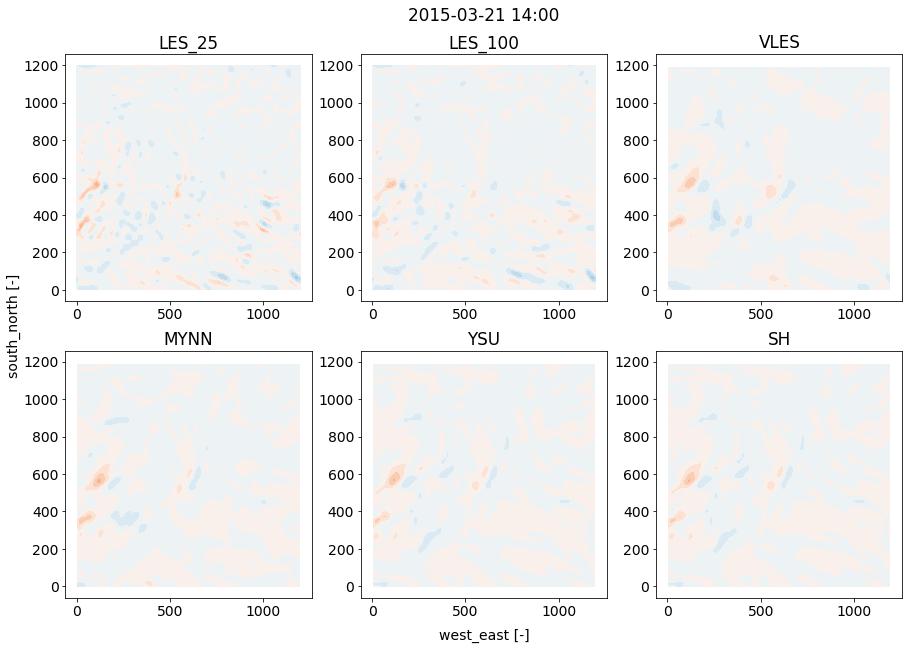

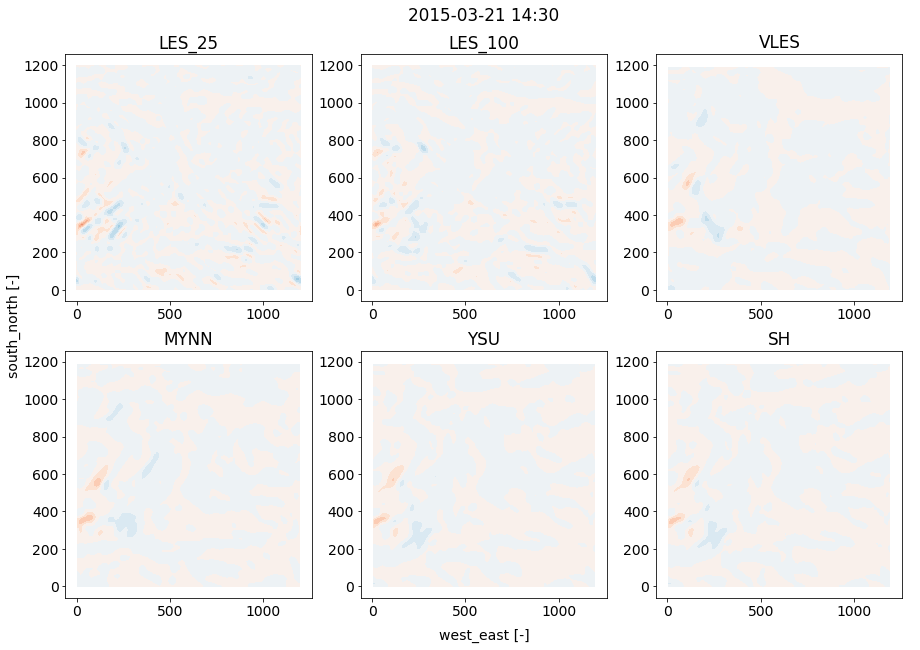

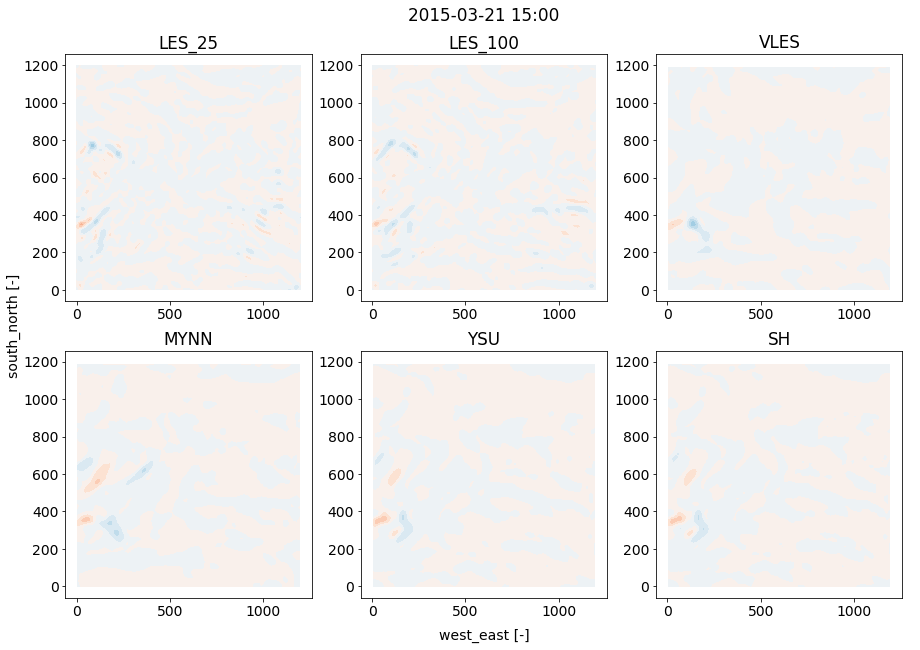

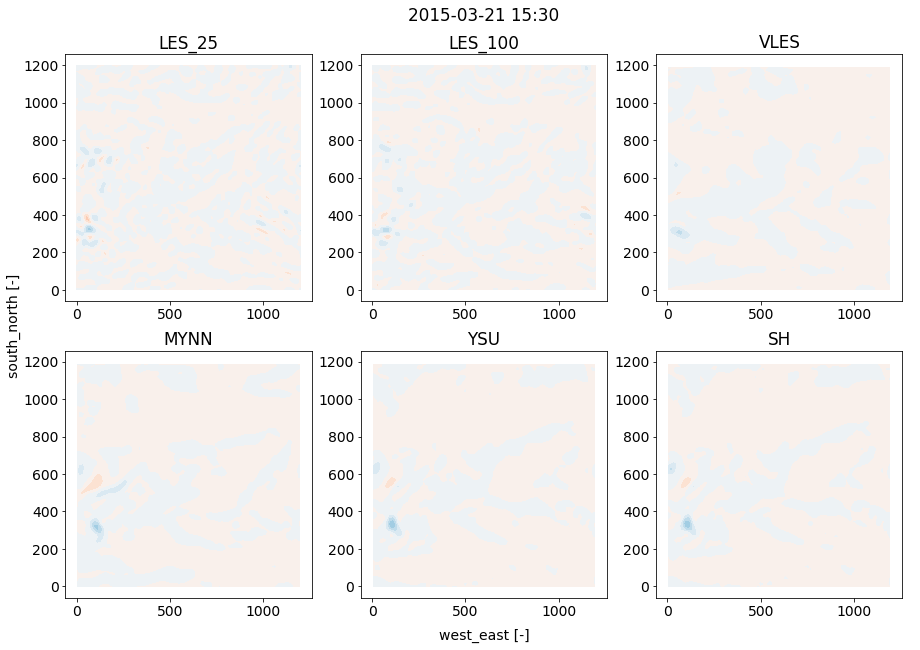

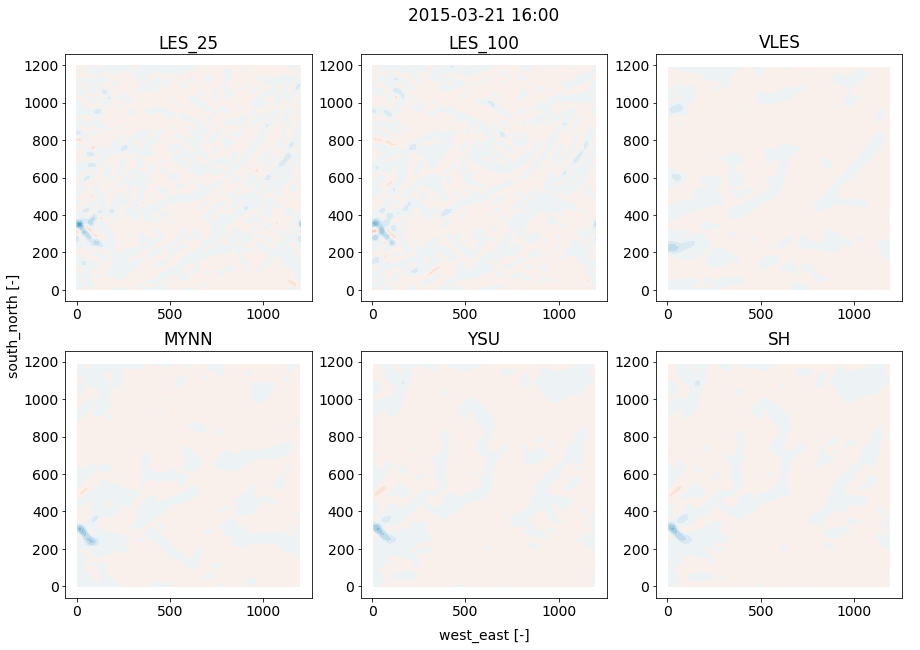

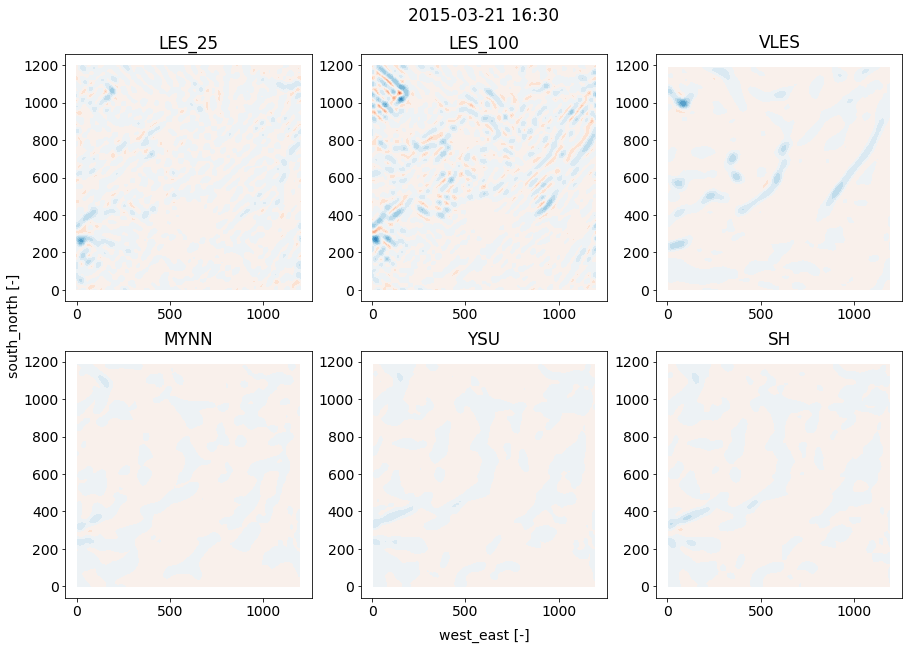

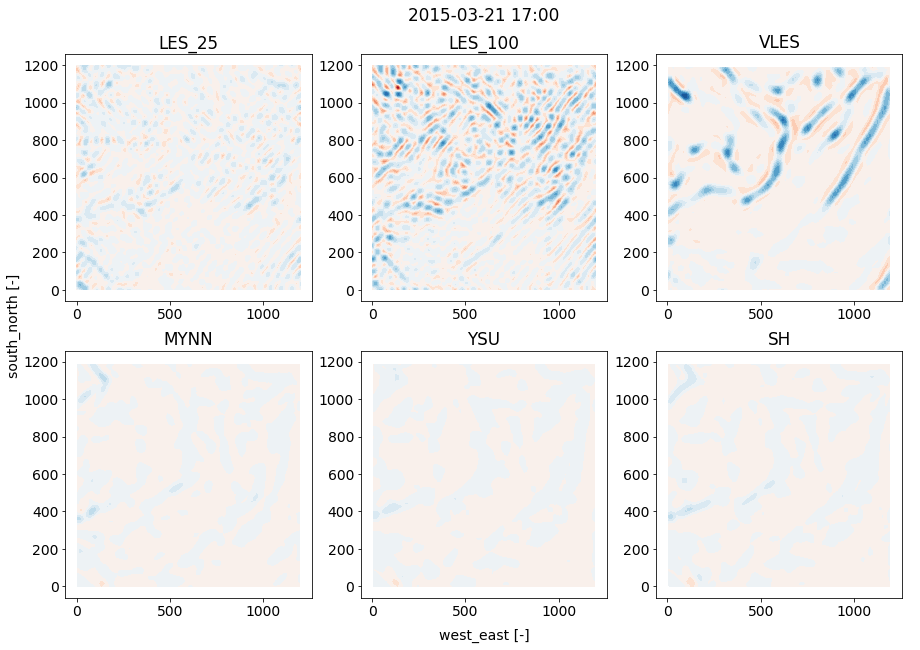

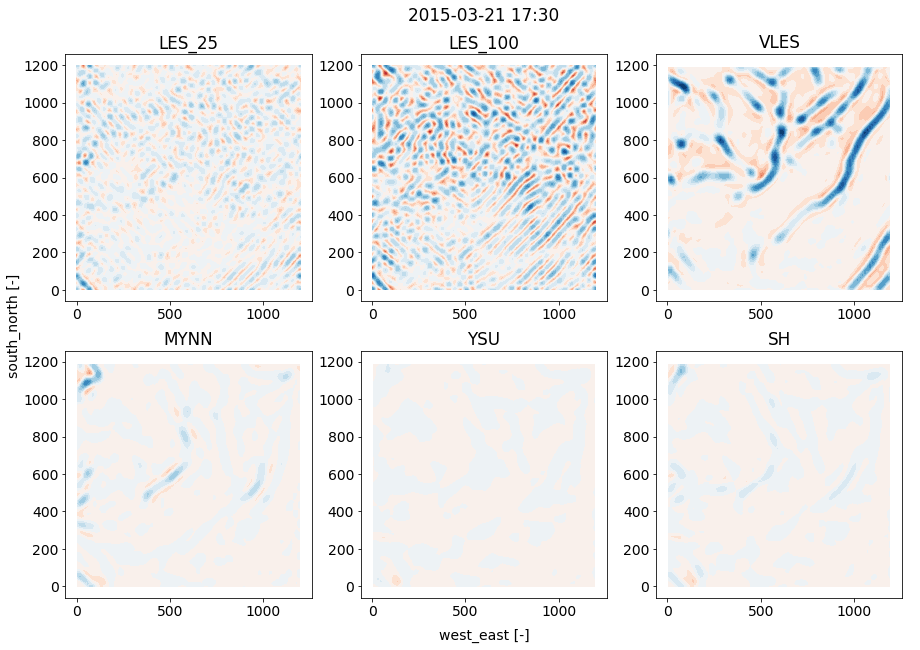

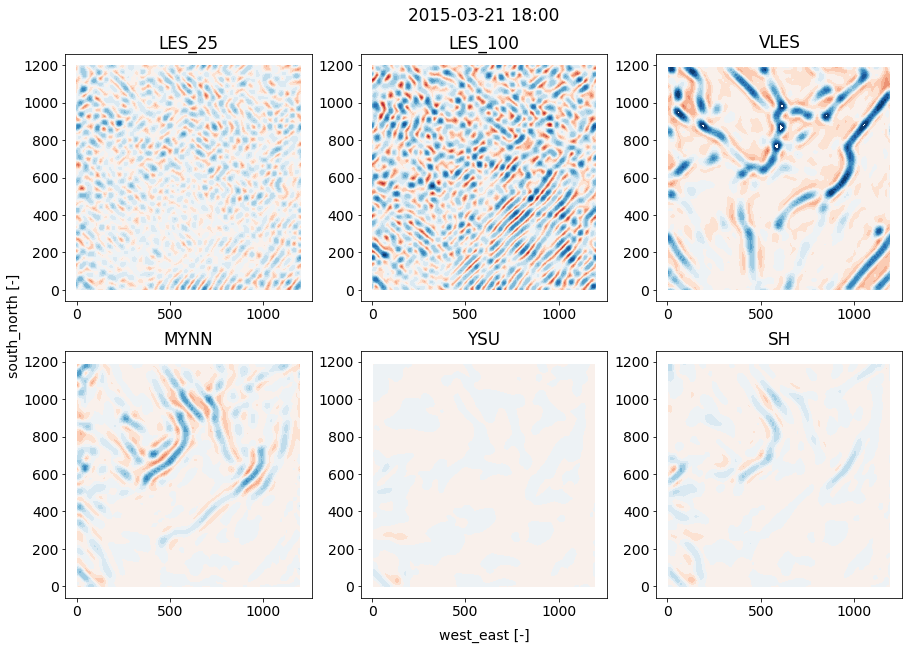

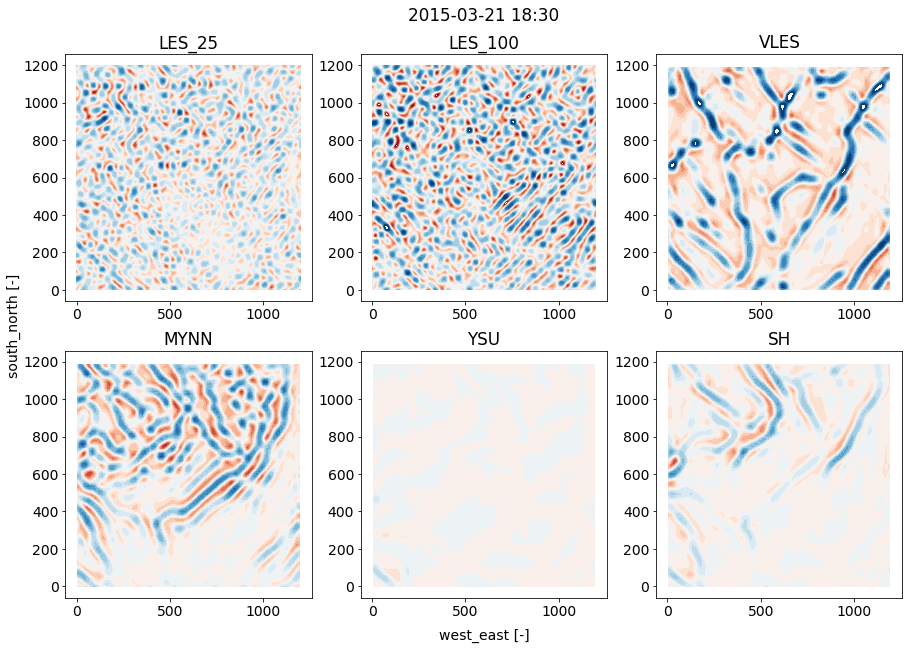

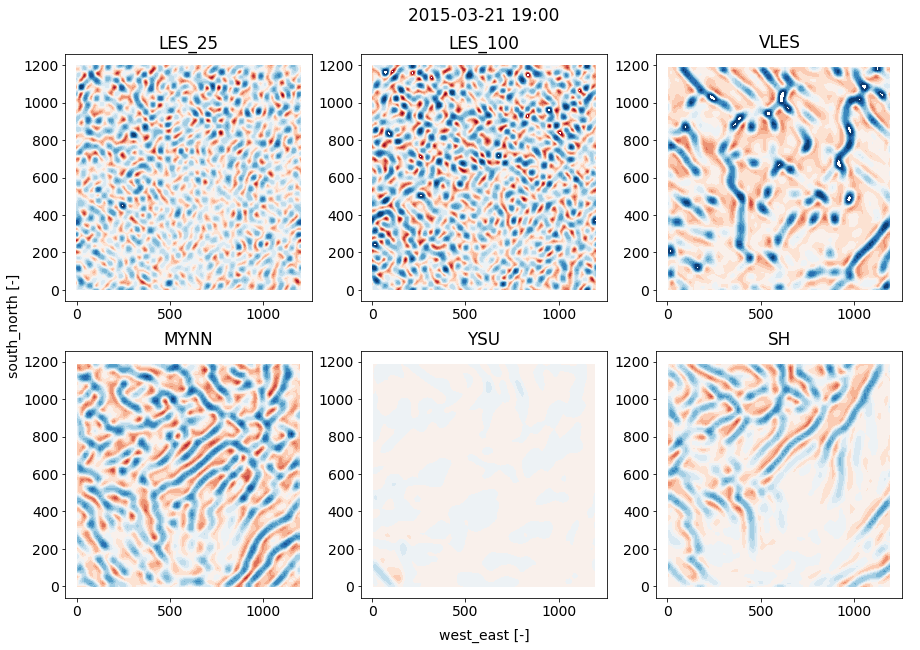

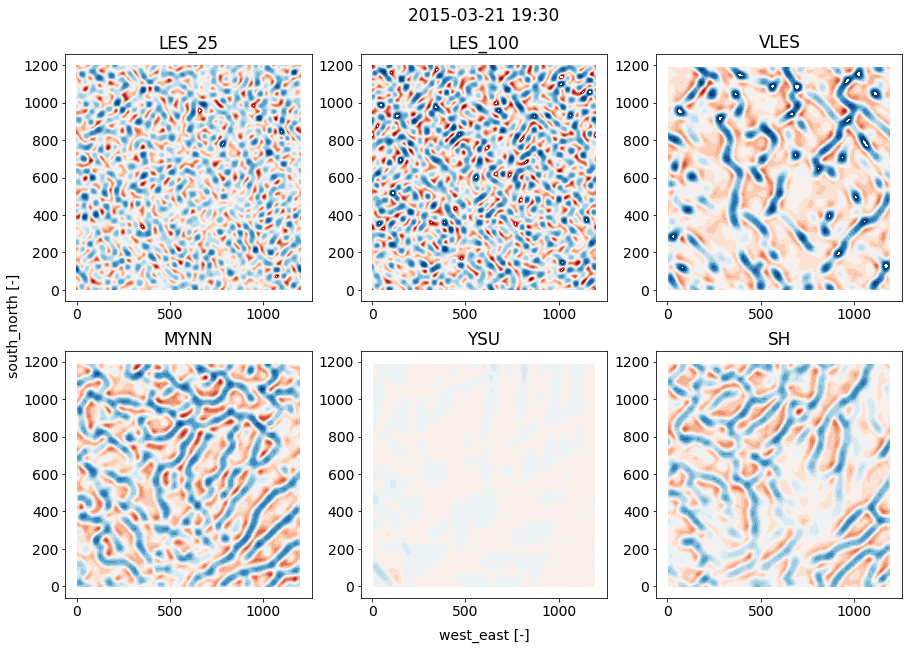

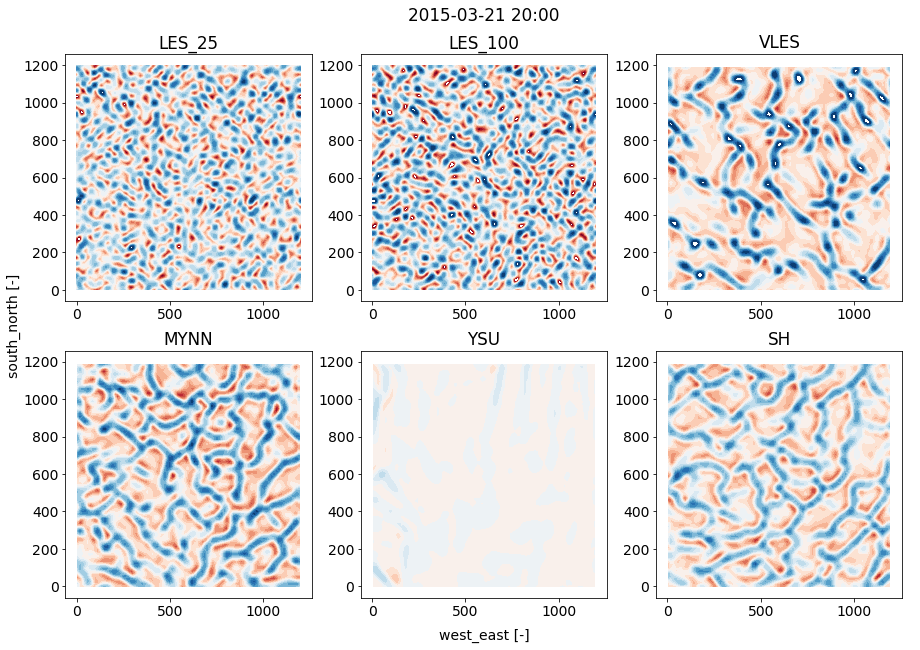

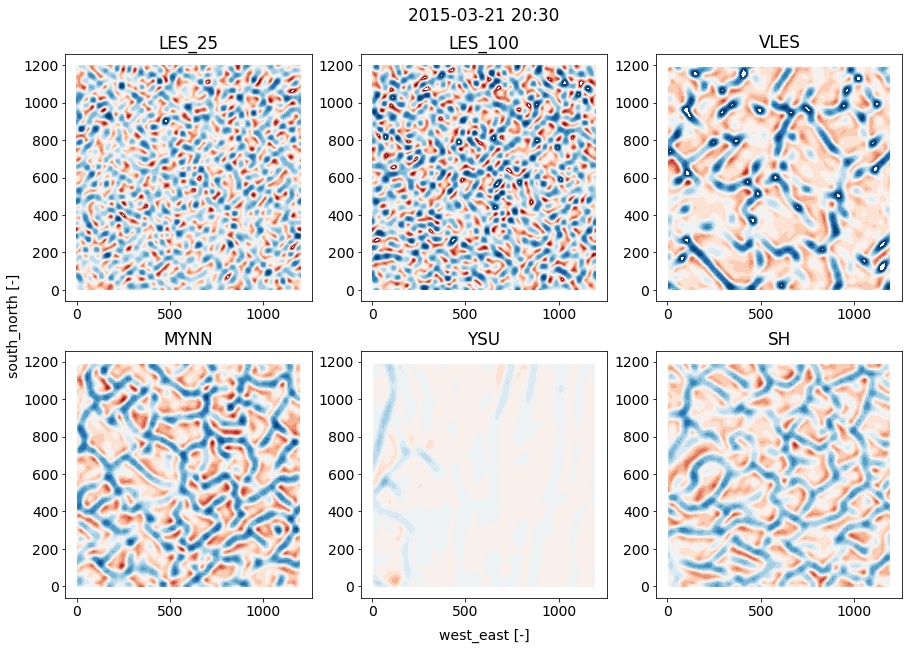

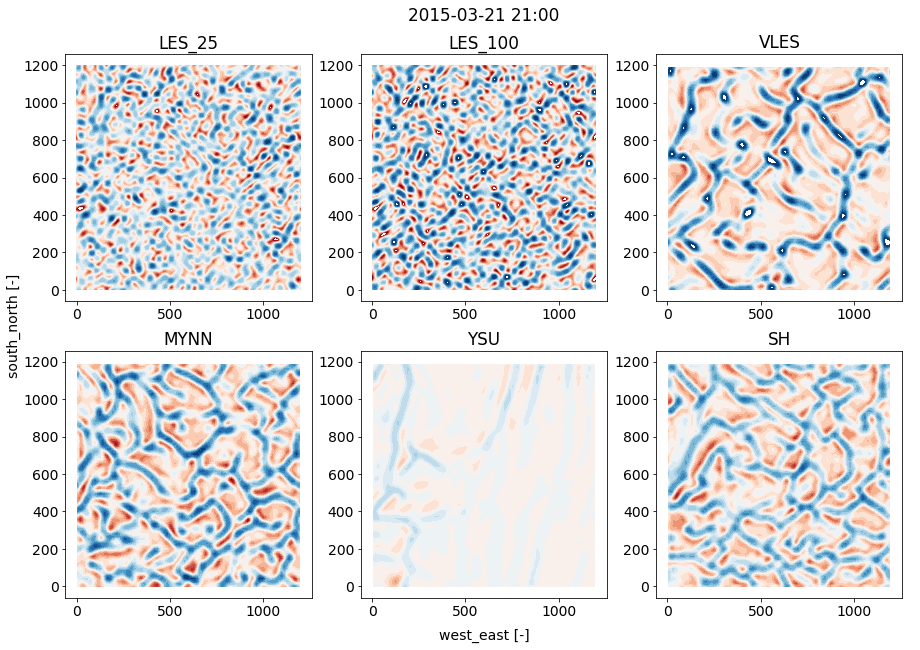

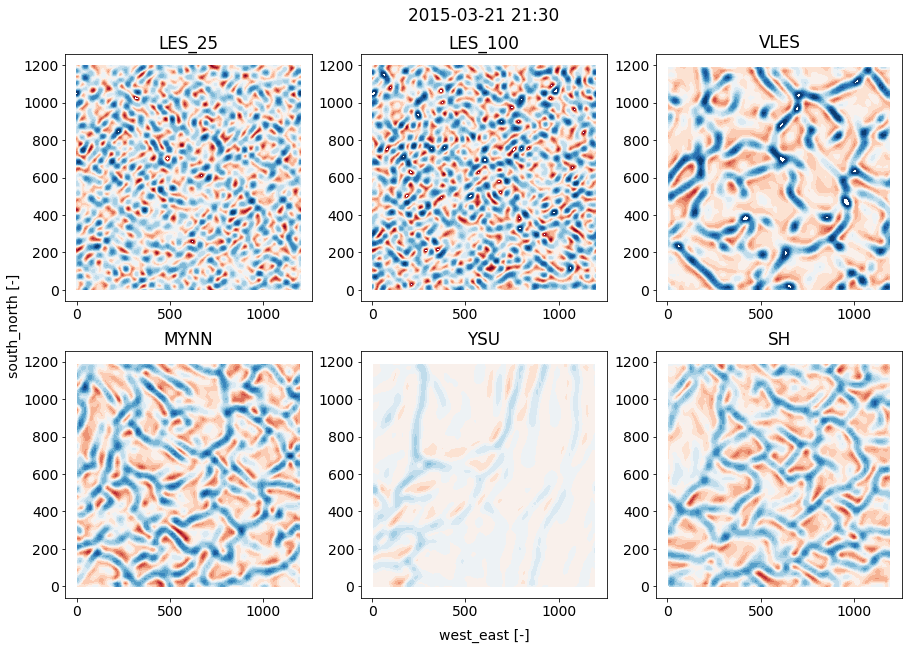

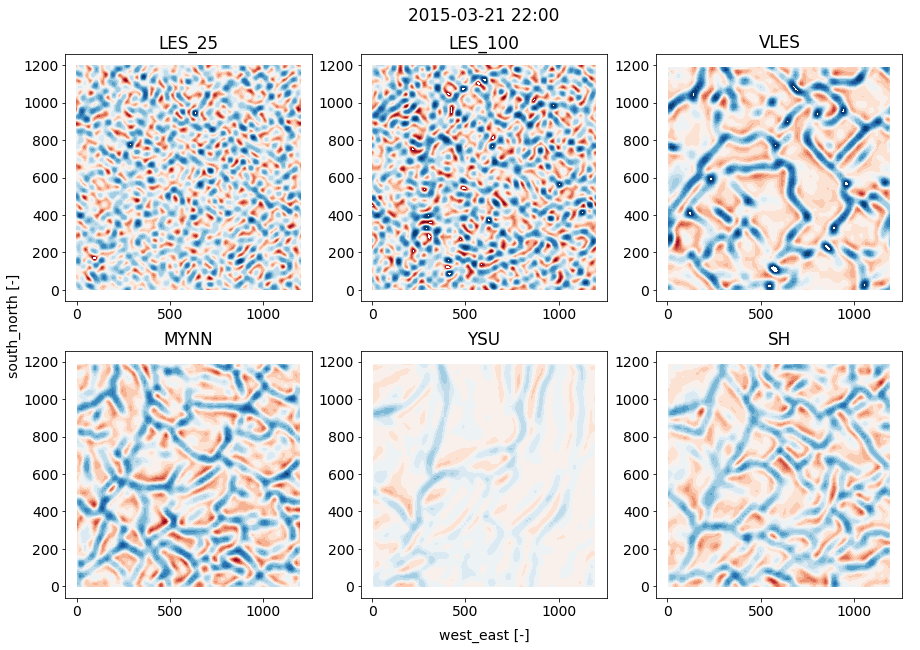

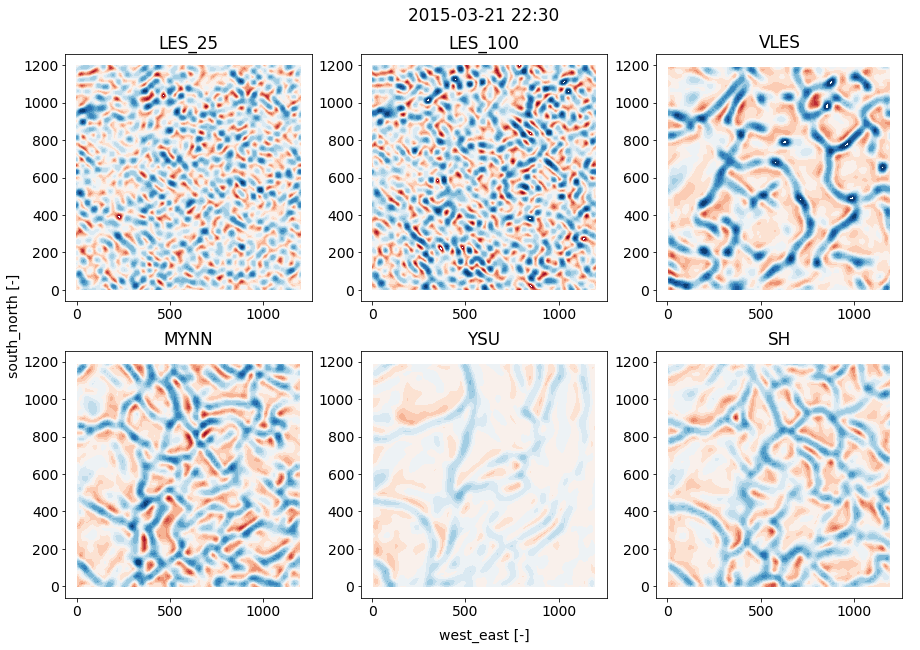

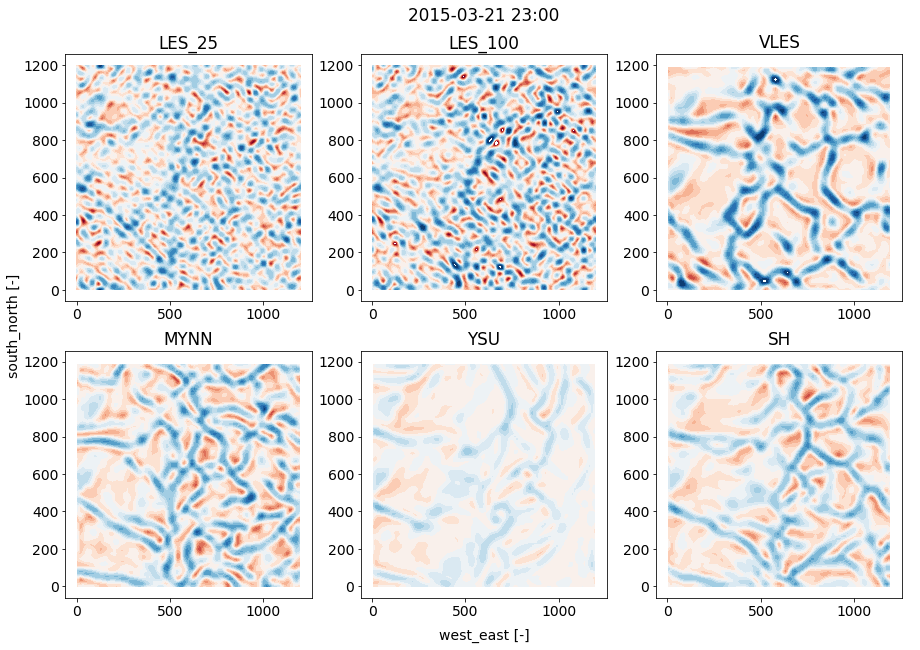

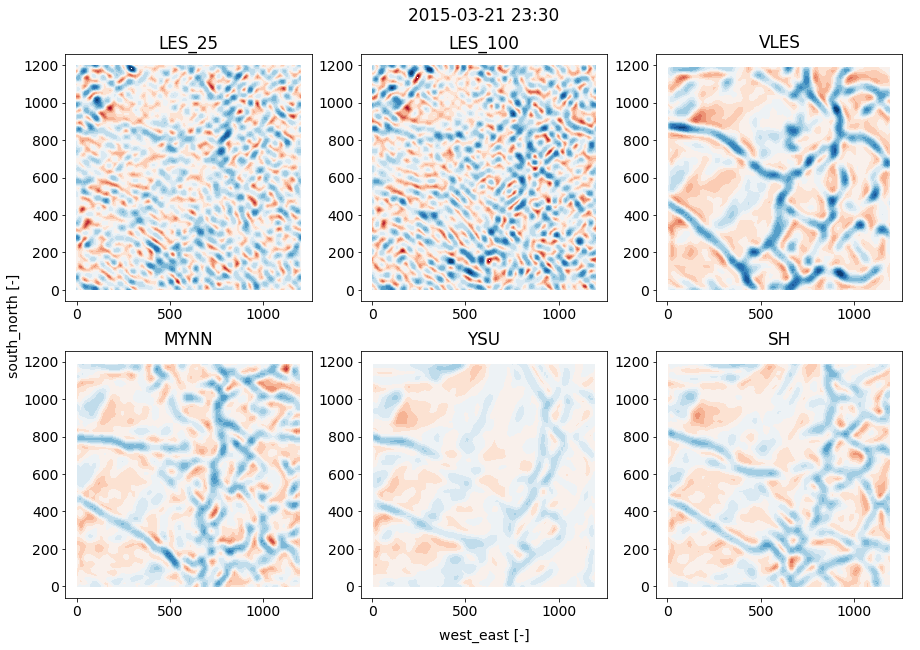

In [11]:
year     = 2015
month    = 3
for hour in range(14,24):
    for minute in [0,30]:
        
        if ( (day==28) & (hour==19) & (minute==30) ):
            break
        
        datetime = to_datetime("{0}-{1}-{2} {3}:{4}".format(year,month,day,hour,minute),format="%Y-%m-%d %H:%M")

        ### read in the simulations I ran

        w     = {}
        xlat  = {}
        xlong = {}

        for key,directory in directories.items():

            if "LES_" not in key:

                print ("**********************************")
                print (key)

                wrfouts = sorted(glob.glob(os.path.join(directory,'wrfout_d03*')))
                ifile   = 0
                for wrfout in wrfouts:
                    # from the file name, figure out what time these data are for
                    time = to_datetime(wrfout.split("_d03_")[-1],format="%Y-%m-%d_%H:%M:%S")

                    # only proceed if after 1400 UTC (1200-1400 is spin up)
                    if ((time-datetime).seconds < 5 * 60.0):
                        print (os.path.split(wrfout)[-1])

                        wrfnc = Dataset(wrfout)

                        #
                        # these are needed for vertical interpolation
                        #
                        if ifile==0:
                            hgt  = wrf.getvar(wrfnc, "ter", units="m")
                            z    = wrf.getvar(wrfnc, "z", units="m")
                            zref = z-hgt

                        w_3d = wrf.getvar(wrfnc, "wa", units="m s-1", timeidx=wrf.ALL_TIMES)
                        w_2d = wrf.interplevel(w_3d, zref, height, meta=True)    

                        if ifile==0:
                            w[key] = w_2d
                        else:
                            w[key] = xarray.concat([w[key], w_2d], dim='Time')

                        if ifile==0:
                            xlat[key]  = wrf.getvar(wrfnc, "lat")
                            xlong[key] = wrf.getvar(wrfnc, "lon")

                        ifile += 1

        ### read in the simulations Domingo ran

        for key,directory in directories.items():

            if "LES_" in key:

                print ("**********************************")
                print (key)

                wrfouts = sorted(glob.glob(os.path.join(directory,'WRF_{0}m_2015-03-{1}*.nc'.format(key,day))))
                ifile   = 0
                for wrfout in wrfouts:

                    wrfnc = xarray.open_dataset(wrfout)
                    time  = to_datetime(wrfnc.time[0].data)

                    if ((time-datetime).seconds < 5 * 60.0):
                        print (os.path.split(wrfout)[-1])                

                        if ifile==0:
                            w[key] = wrfnc["w"]
                        else:
                            w[key] = xarray.concat([w[key], wrfnc["w"]], dim='time')

                        if ifile==0:
                            xlat[key]  = wrfnc["xlat"]
                            xlong[key] = wrfnc["xlong"]

                        ifile += 1        

        for key in ["MYNN","YSU","SH","VLES"]:
            w[key]["time"] = w[key]["Time"]
            w[key] = w[key].expand_dims('time')
            
        ### equivalent x/y coordinates across domains

        x = {}
        y = {}

        ref_wrfnc = Dataset("/glade/scratch/domingom/Cheyenne/XPIA_mesoLES/SIMULS/WRF_mesoLES_4dom_RAP_2015_03_12_mesoLES/HOUR_14_1/wrfout_d04_2015-03-13_14:00:10_0000")
        # ref_wrfnc = Dataset("/glade/scratch/doubrawa/MYNN/032815/wrfout_d03_2015-03-28_13:30:00")

        for key in directories.keys():
            print (key)
            x[key], y[key] = wrf.ll_to_xy(ref_wrfnc, xlat[key], xlong[key])
            x[key]   = np.reshape(x[key].data,w[key].shape[1:])
            y[key]   = np.reshape(y[key].data,w[key].shape[1:])        
            
        ### clip all of them to the same area

        xmin, xmax = np.min(x["LES_25"]), np.max(x["LES_25"])
        ymin, ymax = np.min(y["LES_25"]), np.max(y["LES_25"])

        x_clipped = {}
        y_clipped = {}
        w_clipped = {}

        for key in ["LES_100","MYNN","SH","YSU","VLES"]:

            print (key)

            condition_x = ( (x[key] >= xmin) & (x[key]<=xmax) )
            condition_y = ( (y[key] >= ymin) & (y[key]<=ymax) )
            condition   = condition_x & condition_y

            idx_sn, idx_we = np.where(condition)
            idx_sn = np.unique(idx_sn)
            idx_we = np.unique(idx_we)

            w_clipped[key] = (w[key].isel(west_east=idx_we,south_north=idx_sn)).copy()
            x_clipped[key] = (x[key][idx_sn,idx_we]).copy()
            y_clipped[key] = (y[key][idx_sn,idx_we]).copy()

        x_clipped["LES_25"] = x["LES_25"]
        y_clipped["LES_25"] = y["LES_25"]
        w_clipped["LES_25"] = w["LES_25"]          

        #
        # apply filter
        #
        v_array = {}

        for key in w.keys():
            v_array[key] = get_array_at_time(w_clipped, key, datetime)        
            
        psd_2d      = {}
        kappas_1d   = {}
        kappas_j    = {}
        kappas_i    = {}

        for key in w.keys():
            psd_2d[key]                   = fftpack.fft2(v_array[key])
            kappas_1d[key]                = fftpack.fftfreq(len(v_array[key]),d=dx[key])
            [kappas_j[key],kappas_i[key]] = np.meshgrid(kappas_1d[key],kappas_1d[key])    

        f_cut = 1/(333*4.)    

        psd_2d_filt = {}

        for key in w.keys():
            idx     = np.where( (np.abs(kappas_j[key])>f_cut) | (np.abs(kappas_i[key])>f_cut) )
            psd_2d_filt[key] = psd_2d[key].copy()
            psd_2d_filt[key][idx] = 0.0+0j
            
        v_array_filt = {}
        for key in w.keys():
            v_array_filt[key] = fftpack.ifft2(psd_2d_filt[key])            
            
        levels = np.arange(-1.0,1.1,0.1)
        keys  = ["LES_25","LES_100","VLES","SH","YSU","MYNN"]
        nkeys = len(keys)

        fig = plt.figure(figsize=(15,10))

        axbig = fig.add_subplot(111)
        axbig.spines['top'].set_color('none')
        axbig.spines['bottom'].set_color('none')
        axbig.spines['left'].set_color('none')
        axbig.spines['right'].set_color('none')
        axbig.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
        axbig.set_xlabel("west_east [-]",labelpad=10)
        axbig.set_ylabel("south_north [-]",labelpad=15)
        axbig.set_title("{0:%Y-%m-%d %H:%M}".format(datetime),y=1.05)

        ax  = {}
        for iax,key in enumerate(["LES_25","LES_100","VLES","MYNN","YSU","SH"]):

            print (key)

            if iax==0:
                ax[iax] = fig.add_subplot(2,3,iax+1)
            else:
                ax[iax] = fig.add_subplot(2,3,iax+1,sharex=ax[0],sharey=ax[0])
            ax[iax].set_title(key)

            ax[iax].contourf( x_clipped[key], 
                              y_clipped[key], 
                              v_array_filt[key],
                              levels=levels,
                              cmap="RdBu")


        fig.subplots_adjust()
        fig.savefig(os.path.join(figPath,"contours_w_clipped_filtered_{0:%Y-%m-%d-%H-%M}.png".format(datetime)),bbox_to_inches="tight")                